<a href="https://colab.research.google.com/github/pavanm555/Artificial-Intelligence/blob/main/5_ANN_Model_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In Ann model, we will be going with the Regression and Classification

### Regression---> Target variable (5483, 34535, 1313453.453,...)

### Classification ---> Target variable (0 or 1, cat or dog,...)

### Tensorflow and keras ---> Google product

## Regression

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37
107,91749.16,114175.79,294919.57,Florida,124266.90


In [ ]:
df.describe(include = "all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108,108.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,39,NaN
mean,74959.338704,121750.788889,214952.664722,NaN,113523.760000
std,44996.368152,27322.385654,117937.942120,NaN,38991.013654
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,38558.510000,105077.645000,134050.070000,NaN,90708.190000
50%,75791.365000,122699.795000,239452.750000,NaN,109543.120000
75%,101913.080000,145077.580000,298664.470000,NaN,141585.520000


In [ ]:
# Checking for null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df['Profit'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


<Axes: >

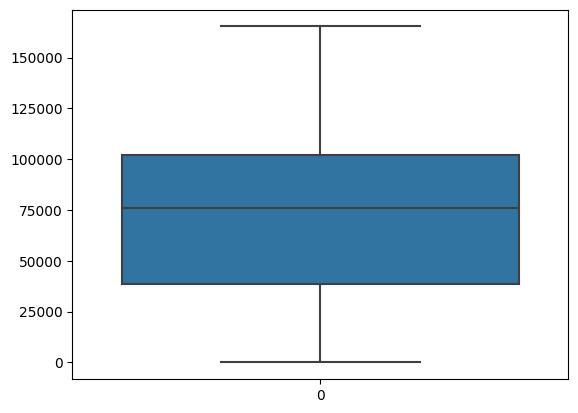

In [ ]:
# Checking for outliers
sns.boxplot(df['R&D Spend'])

<Axes: >

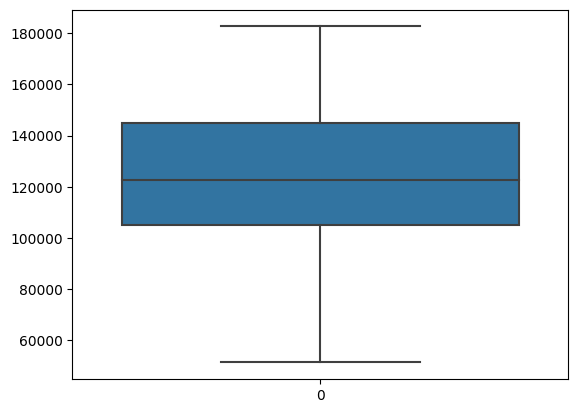

In [ ]:
sns.boxplot(df['Administration'])

In [ ]:
names = list(df.columns)
names.remove("State")
names

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [ ]:
for i,j in enumerate(names):
  print(i,j)

0 R&D Spend
1 Administration
2 Marketing Spend
3 Profit


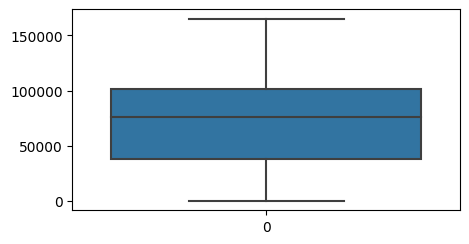

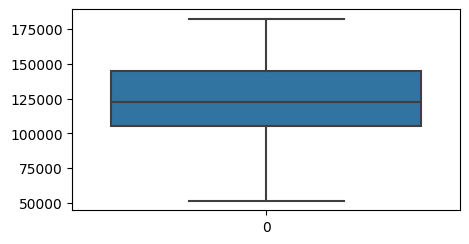

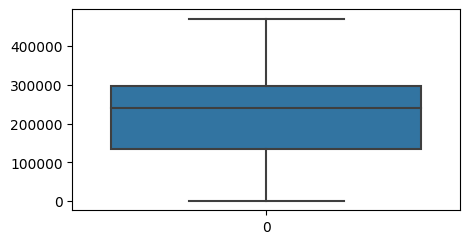

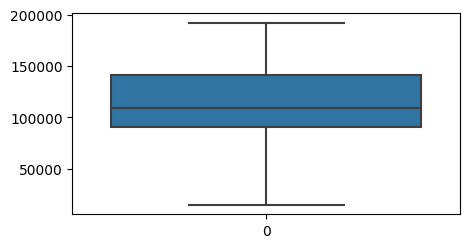

In [ ]:
for i,j in enumerate(names):
  plt.figure(figsize=(5,12))
  plt.subplot(4,1,i+1)
  sns.boxplot(df[j])

<Axes: >

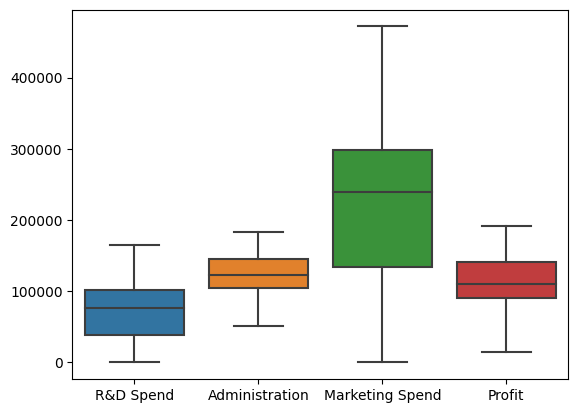

In [ ]:
sns.boxplot(df)

## Spliting the data

### Step-1: Split dependent and in-dependent
### Step-2: Split training and testing data

In [ ]:
x = df.iloc[:,0:4]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
y = df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
# Split the training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
x.shape, y.shape

((108, 4), (108,))

In [ ]:
xtrain.shape, xtest.shape

((86, 4), (22, 4))

In [ ]:
ytrain.shape, ytest.shape

((86,), (22,))

## Converting the object type to numeric
## Encoding
### ---> One Hot encoding
### ---> Label encoding
### ---> Manual encoding


In [ ]:
"""
# One Hot Encoding

Florida     New York      California
   0           1               0
   0           0               1
   1           0               0
   0           1               0
   1           0               0

# Label encoding

Automatically lib will assign value to the text (values will be assigned based on the Alph. order.)

Florida, New York & California - 1,2,0

# Manual encoding

User defining the value for the text

"""

'\n# One Hot Encoding\n\nFlorida     New York      California\n   0           1               0\n   0           0               1\n   1           0               0\n   0           1               0\n   1           0               0\n\n# Label encoding\n\nAutomatically lib will assign value to the text (values will be assigned based on the Alph. order.)\n\nFlorida, New York & California - 1,2,0\n\n# Manual encoding\n\nUser defining the value for the text\n'

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(df['State'])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1])

In [ ]:
# Example for encoding

## One hot encoding

'''rank = ['First','Second','Last']
data = pd.DataFrame(rank,columns=['Rank'])
oneHotEncode = pd.get_dummies(data['Rank'])
oneHotEncode '''

## Label encoder

'''
a = np.array(['Hari','Srikanth','Saumya'])
b = a.copy()
print('a :',a)
print('b :',b)

encoder = LabelEncoder()
a_encoder = encoder.fit_transform(a)
print('a_encoder :',a_encoder)
b_encoder = encoder.transform(b)
print('b_encoder :',b_encoder)
print('Transform :',encoder.transform(['Hari']))
print('Inverse Transform :',encoder.inverse_transform([1]))'''

## Manual encoder
'''
rank = ['First','Second','Last']
data = pd.DataFrame(rank,columns=['Rank'])
data['Rank_encoder'] = data['Rank'].replace({'Last':0, 'Second':1, 'First':2})
data'''

"\nrank = ['First','Second','Last']\ndata = pd.DataFrame(rank,columns=['Rank'])\ndata['Rank_encoder'] = data['Rank'].replace({'Last':0, 'Second':1, 'First':2})\ndata"

In [ ]:
xtrain['State'] = le.fit_transform(xtrain['State'])
xtrain['State']

12    1
68    2
1     0
15    2
38    2
     ..
3     2
2     1
6     0
27    2
75    1
Name: State, Length: 86, dtype: int64

In [ ]:
xtest['State'] = le.transform(xtest['State'])
xtest['State']

36     1
21     2
19     2
98     0
39     0
14     1
102    0
60     2
26     1
81     0
7      1
40     0
31     2
17     2
97     2
8      2
46     1
92     2
85     1
9      0
51     1
58     2
Name: State, dtype: int64

## Build an ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Initializing the seq model
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(4,activation='relu'))
# Adding the 1st hidden layer to the model
reg_model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(32,activation='relu'))
# Adding output layer
reg_model.add(Dense(1,activation='linear'))

In [ ]:
# Compiling the skeleton with loss and gradient decent
reg_model.compile(optimizer='adam',loss='mse')

In [ ]:
# Training the model
reg_model.fit(xtrain, ytrain, batch_size=4, epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 2ms/step - loss: 13625443328.0000
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 9214750720.0000
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 4631029248.0000
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 2316877824.0000
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 1743137152.0000
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 1477628416.0000
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 1221089664.0000
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 1096221568.0000
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 1024907200.0000
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 955841408.0000


In [ ]:
# Testing the model
ypred = reg_model.predict(xtest)

1/1 [==============================] - 0s 140ms/step


In [ ]:
# Comparing predicted with the actual value

comp = pd.DataFrame(ytest)  # Creating a dataframe
comp.columns = ['Actual Value']  # Changing the column name
comp['Predicted values'] = ypred  # Creating a column based onth prediction
comp

,Actual Value,Predicted values
36,90708.19,137355.984375
21,111313.02,166363.453125
19,122776.86,79271.398438
98,149759.96,118213.500000
39,81005.76,91194.804688
14,132602.65,161545.265625
102,134307.35,143414.500000
60,111313.02,166363.453125
26,105733.54,144140.671875
81,71498.49,103458.226562


In [ ]:
reg_model.predict([[324234,4545645,234234,2]])

1/1 [==============================] - 0s 163ms/step


array([[1666560.]], dtype=float32)

## Classification

In [ ]:
# Reading the data
df = pd.read_csv('/content/Iris.csv')
df.head()  # Visualizing the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Finding unique category
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Splitting the data
x = df.iloc[:,1:5]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df.iloc[:,5:]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
# Split the training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=21)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [ ]:
# Using label encoder
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
ytrain

array([0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 0, 0, 1])

In [ ]:
# ANN Model
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(xtrain,ytrain,epochs=10,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/10
24/24 [==============================] - 1s 11ms/step - loss: 1.0541 - accuracy: 0.4333 - val_loss: 0.9336 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.9268 - accuracy: 0.5250 - val_loss: 0.7876 - val_accuracy: 0.8000
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.7893 - accuracy: 0.6833 - val_loss: 0.6358 - val_accuracy: 0.7667
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.6417 - val_loss: 0.5130 - val_accuracy: 0.7667
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6500 - val_loss: 0.4597 - val_accuracy: 0.7667
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.6500 - val_loss: 0.4339 - val_accuracy: 0.8000
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.6583 - val_loss: 0.4458 - val_accuracy: 0.7667
Epoch 8/10
24/24 [=

In [ ]:
# Testing
ypred = model.predict([[2.5,4.34,5.3,1.3]])
print(ypred)
ypred = np.argmax(ypred)
output = ['Iris-setosa','Iris-versicolor','Iris-virginica']
output[ypred]

1/1 [==============================] - 0s 43ms/step
[[0.13426825 0.36219177 0.50354   ]]


'Iris-virginica'